### Exercise 06
### Index No: 190108X
### Name: Chathuranga M.M.P.

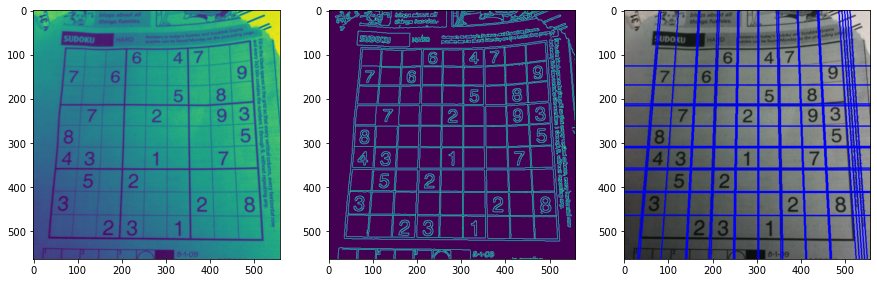

In [1]:
# Question 1

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'sudoku.png',cv.IMREAD_COLOR)
assert img is not None

gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges=cv.Canny(gray,20,120,apertureSize=3)
lines=cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta=line[0]
    a=np.cos(theta)
    b=np.sin(theta)
    x0,y0=a*rho,b*rho
    x1,y1=int(x0+1000*(-b)),int(y0+1000*(a))
    x2,y2=int(x0-1000*(-b)),int(y0-1000*(a))
    
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(gray)
ax[1].imshow(edges)
ax[2].imshow(img)

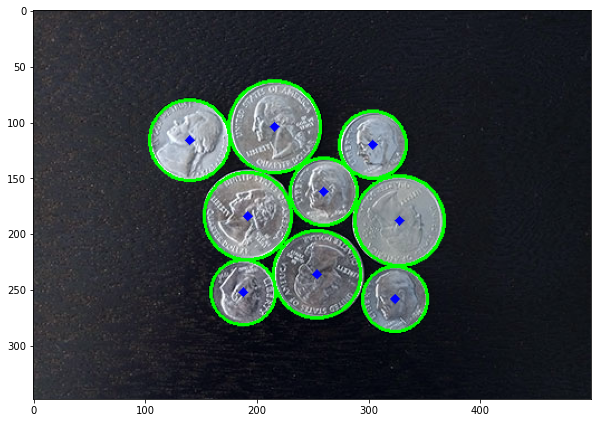

In [1]:
# Question 2

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'coins.jpg',cv.IMREAD_COLOR)
assert img is not None
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50,param1=180,param2=80,minRadius=10,maxRadius=80)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)
    
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(img)

x = 29.0, y= 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


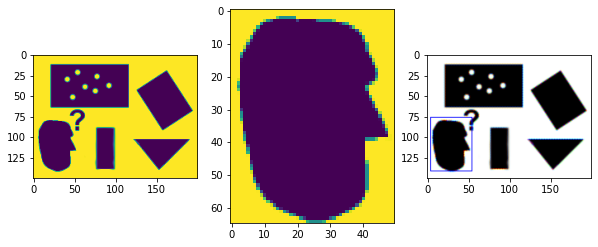

In [42]:
# Question 3

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img=cv.imread(r'pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
temp=cv.imread(r'templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp is not None

im_edges=cv.Canny(img,50,250)
temp_edges=cv.Canny(temp,50,250)
alg=cv.createGeneralizedHoughGuil()
alg.setTemplate(temp_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions,votes=alg.detect(im_edges)

out=cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight=temp.shape[0]/2.0*scale
    halfWidth=temp.shape[1]/2.0*scale
    p1=(int(x-halfWidth),int(y-halfHeight))
    p2=(int(x+halfWidth),int(y+halfHeight))
    print('x = {}, y= {}, scale = {}, orientation = {}, p1 = {}, p2 = {}'.format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))
    
fig,ax=plt.subplots(1,3,figsize=(10,10))
ax[0].imshow(img)
ax[1].imshow(temp)
ax[2].imshow(out)

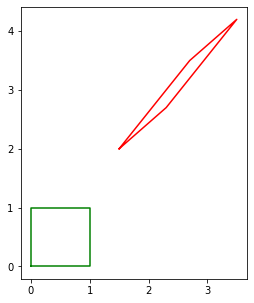

In [44]:
# Question 4

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

a,b,c,d=[0,0,1],[0,1,1],[1,1,1],[1,0,1]
X=np.array([a,b,c,d]).T

theta=np.pi*30/180
s=2
tx,ty=1.5,2
#H=np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
#Y=H@X

a11,a12,a21,a22=0.8,1.2,0.7,1.5
A=np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])
Y=A@X

x=np.append(X[0,:],X[0,0])
y=np.append(X[1,:],X[1,0])

fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(x,y,color='g')
ax.set_aspect('equal')


x=np.append(Y[0,:],Y[0,0])
y=np.append(Y[1,:],Y[1,0])

ax.plot(x,y,color='r')
ax.set_aspect('equal')
plt.show()

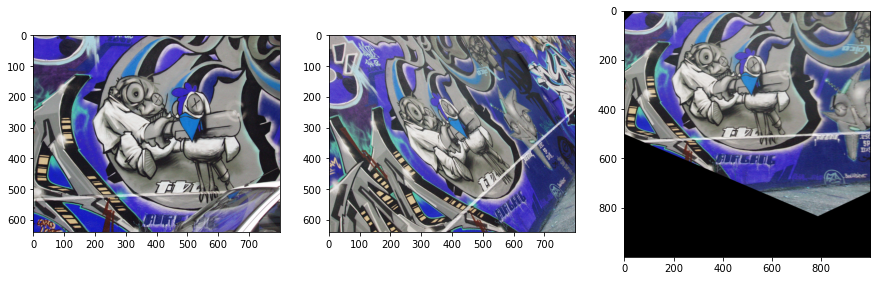

In [49]:
# Question 5

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img1=cv.imread(r'graf/img1.ppm',cv.IMREAD_ANYCOLOR)
assert img1 is not None
img4=cv.imread(r'graf/img4.ppm',cv.IMREAD_ANYCOLOR)
assert img4 is not None

#H=np.array([[6.6378505e-01, 6.8003334e-01, -3.1230335e+01],[-1.4495500e-01, 9.7128304e-01, 1.4877420e+02],[4.2518504e-04,-1.3930359e-05,1.0000000e+00]])

H=[]
with open(r'graf/H1to4p') as f:
    H=np.array([[float(h) for h in line.split()] for line in f])
img4to1=cv.warpPerspective(img4,np.linalg.inv(H),(1000,1000))

fig,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(img1)
ax[1].imshow(img4)
ax[2].imshow(img4to1)